In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
a = np.load('./split_data_log.npy',allow_pickle=True)

In [6]:
a

array({'historydata': [0, 5000], 'sub1': [4975, 5569], 'sub2': [5552, 6082], 'sub3': [6070, 6600], 'sub4': [6598, 7129], 'sub5': [7098, 7692], 'sub6': [7686, 8227], 'sub7': [8207, 8792], 'sub8': [8749, 9305], 'sub9': [9261, 9816], 'sub10': [9771, 10301], 'sub11': [10259, 10835], 'sub12': [10819, 11370], 'sub13': [11367, 11893], 'sub14': [11852, 12359], 'sub15': [12314, 12911], 'sub16': [12892, 13465], 'sub17': [13457, 13960], 'sub18': [13919, 14437], 'sub19': [14398, 14989], 'sub20': [14971, 15496], 'sub21': [15485, 16008], 'sub22': [15984, 16573], 'sub23': [16553, 17086], 'sub24': [17064, 17583], 'sub25': [17567, 18122], 'sub26': [18085, 18620], 'sub27': [18572, 19107], 'sub28': [19072, 19649], 'sub29': [19608, 20188], 'sub30': [20166, 20762], 'sub31': [20746, 21293], 'sub32': [21260, 21766], 'sub33': [21742, 22288], 'sub34': [22245, 22809], 'sub35': [22774, 23282], 'sub36': [23254, 23832], 'sub37': [23809, 24310], 'sub38': [24295, 24799], 'sub39': [24767, 25294], 'sub40': [25277, 258

# 数据筛选与排序与“历史训练集和未来测试”场景构建

(43500, 20)


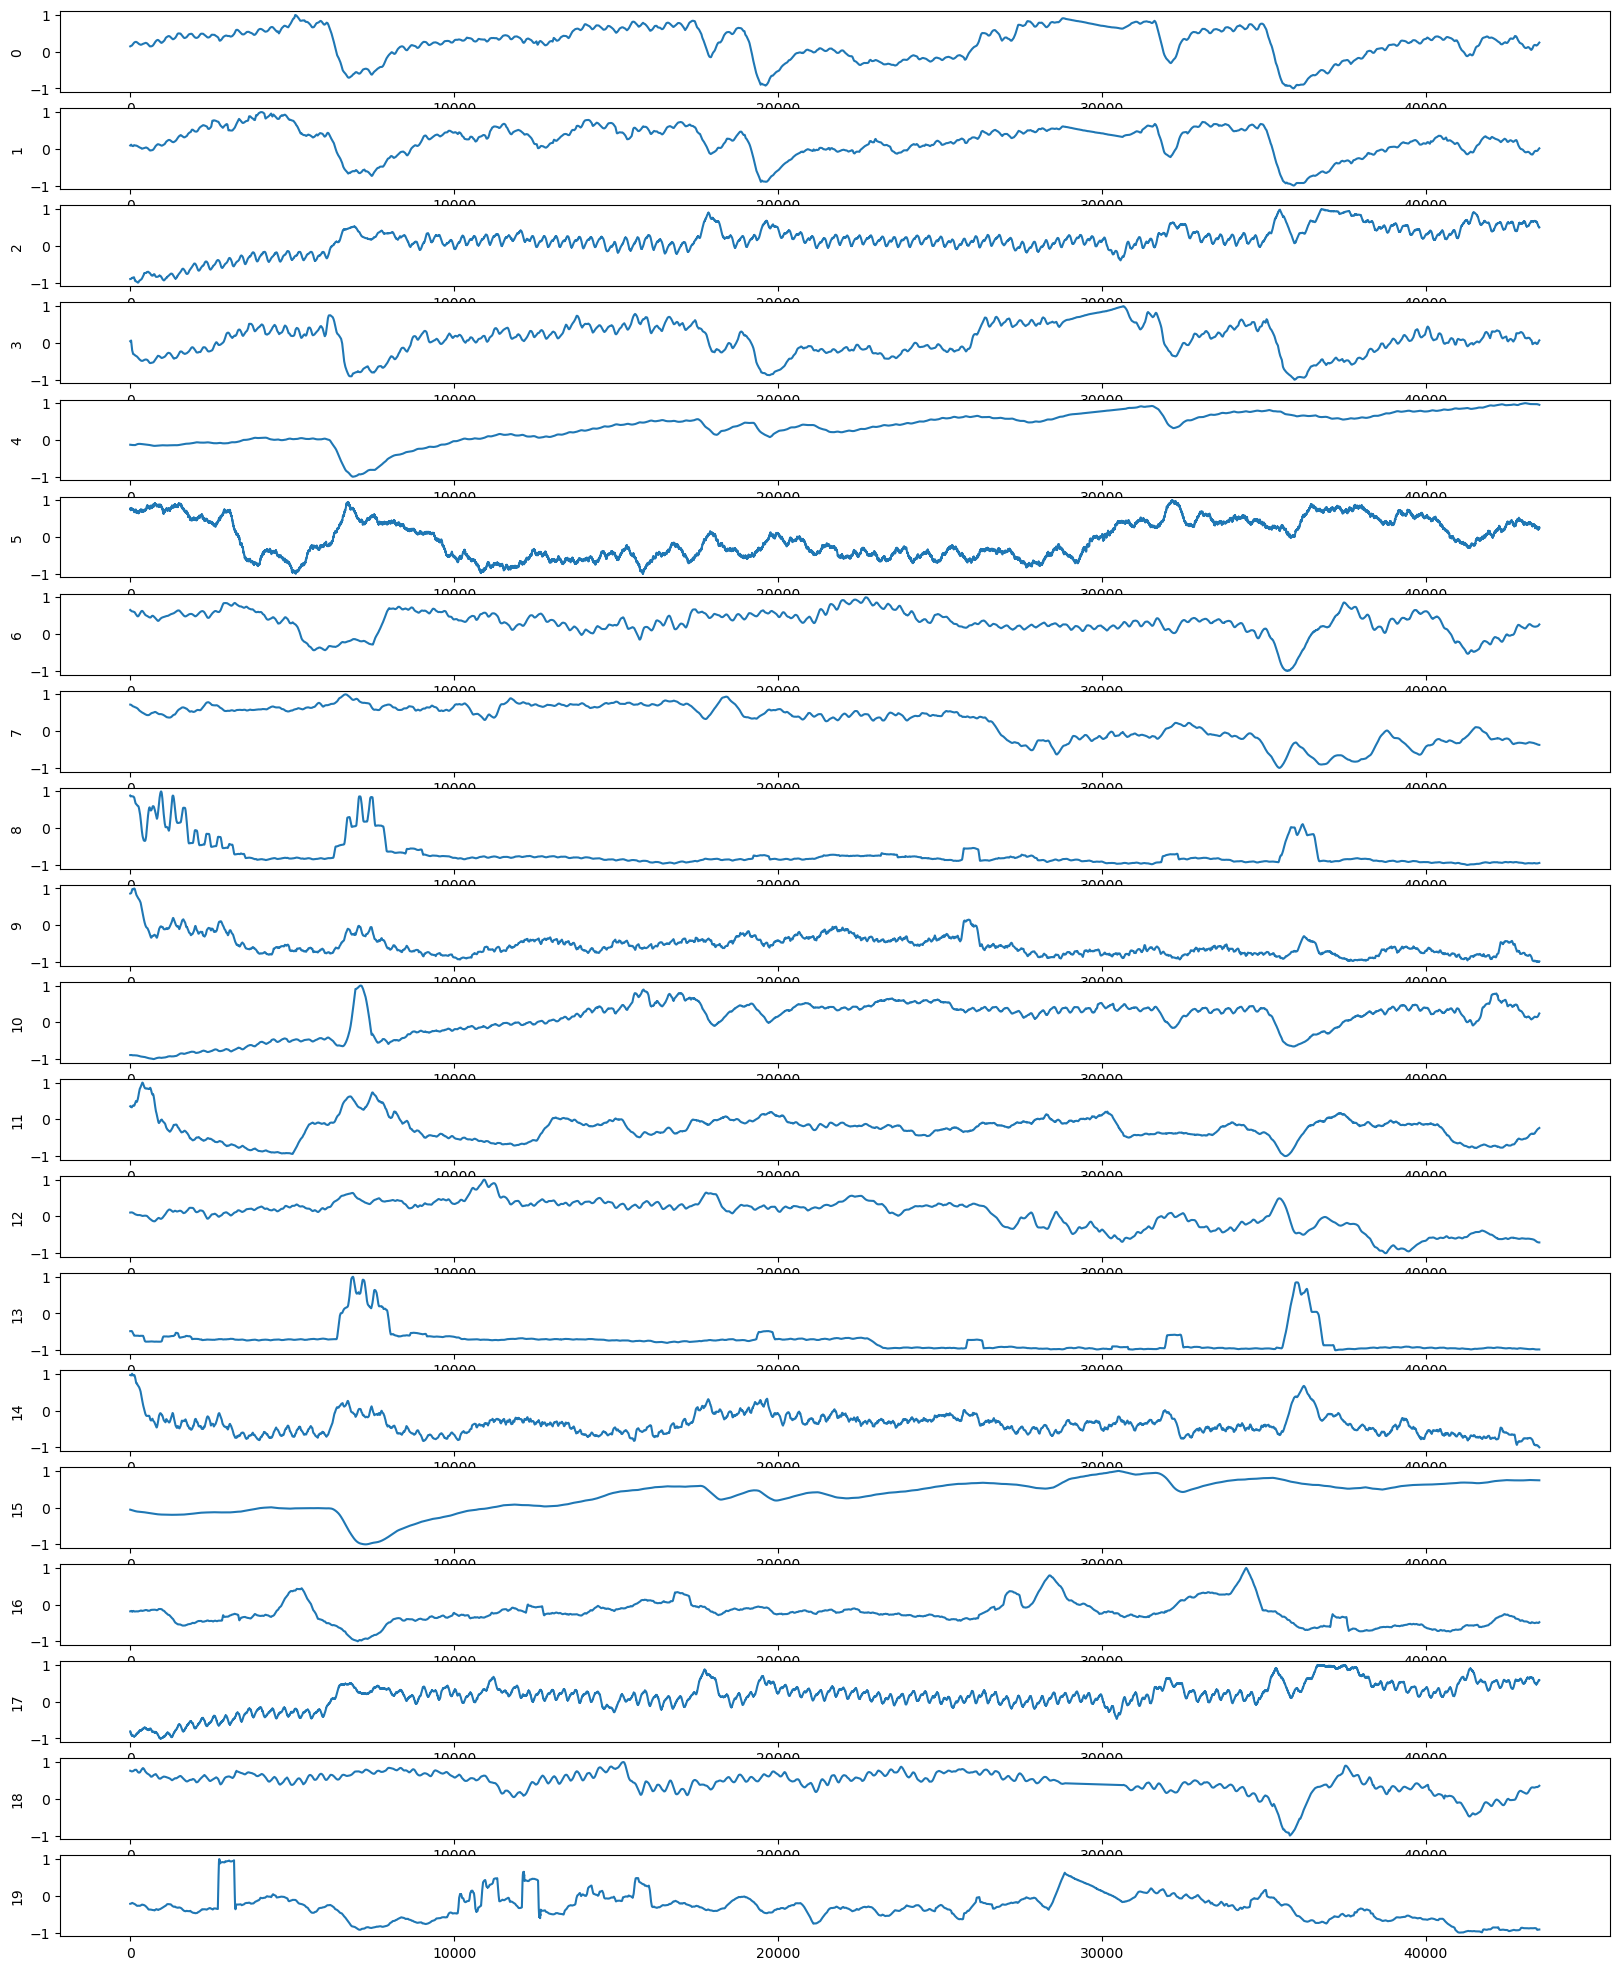

In [19]:
# Get data.csv (包含进水与出水)
original_data = pd.read_csv('./data/sdata.csv').values[500:44000,1:]

# 归一化
#alldata use same max and min
maxd,mind = np.max(original_data,axis=0),np.min(original_data,axis=0)
datamaxmin={'max':maxd,'min':mind}
np.save('./databygroup_maxmin.npy',datamaxmin)

data=original_data.copy()
for i in range(maxd.shape[0]):
    data[:,i] = 2*(original_data[:,i]-mind[i])/(maxd[i]-mind[i])-1
pd.DataFrame(data).to_csv('./ndata/data.csv')
print(data.shape)

fig,ax = plt.subplots(data.shape[1],1,figsize=(20,25))
for k in range(data.shape[1]):
    ax[k].plot(data[:,k])
    ax[k].set_ylabel(k)


# 划分数据集，用于后续数据相似性分析

In [20]:
# 将该数据分为多个，方便后续使用，暂定100个子集

ind = [[0,5000]]
tem = ind[-1][1] - np.random.randint(0, 50)
delt = np.random.randint(500,600)
while tem + delt < data.shape[0]:
    ind.append([tem,tem + delt])
    tem = ind[-1][1] - np.random.randint(0, 50)
    delt = np.random.randint(500,600)
ind.append([ind[-1][1]-50,data.shape[0]-1])

In [21]:
#ind = np.load('split_data_log.npy',allow_pickle=True).tolist()
files = {}
for k in range(len(ind)):
    if k == 0:
        files['historydata'] = ind[k]
    else:
        files['sub'+str(k)] = ind[k]

np.save('./split_data_log.npy',files)

DBG={}
for f in files:
    DBG[f]=data[files[f][0]:files[f][1],:]
print(DBG.keys())

dict_keys(['historydata', 'sub1', 'sub2', 'sub3', 'sub4', 'sub5', 'sub6', 'sub7', 'sub8', 'sub9', 'sub10', 'sub11', 'sub12', 'sub13', 'sub14', 'sub15', 'sub16', 'sub17', 'sub18', 'sub19', 'sub20', 'sub21', 'sub22', 'sub23', 'sub24', 'sub25', 'sub26', 'sub27', 'sub28', 'sub29', 'sub30', 'sub31', 'sub32', 'sub33', 'sub34', 'sub35', 'sub36', 'sub37', 'sub38', 'sub39', 'sub40', 'sub41', 'sub42', 'sub43', 'sub44', 'sub45', 'sub46', 'sub47', 'sub48', 'sub49', 'sub50', 'sub51', 'sub52', 'sub53', 'sub54', 'sub55', 'sub56', 'sub57', 'sub58', 'sub59', 'sub60', 'sub61', 'sub62', 'sub63', 'sub64', 'sub65', 'sub66', 'sub67', 'sub68', 'sub69', 'sub70', 'sub71', 'sub72', 'sub73', 'sub74'])


In [22]:
np.save('./databygroup.npy',DBG) 
# 保存到各个文件夹
os.chdir(os.path.pardir)
np.save('./Step2_Koopman/databygroup.npy',DBG)
np.save('./Step2_Koopman/databygroup_maxmin.npy',datamaxmin)  

np.save('./Step3_dataselect/databygroup.npy',DBG)
np.save('./Step3_dataselect/databygroup_maxmin.npy',datamaxmin)  


np.save('./Step4_DNN-alldata/databygroup.npy',DBG)
np.save('./Step4_DNN-alldata/databygroup_maxmin.npy',datamaxmin)

np.save('./Step4_DNN-augdata/databygroup.npy',DBG)
np.save('./Step4_DNN-augdata/databygroup_maxmin.npy',datamaxmin)

os.chdir('./Step1_datasplit')
print(os.getcwd())

/root/Koopman_WQ_v3/Step1_datasplit
